#     Sparks Foundation : Data Science & Business Analytics Internship

# Task 1:- Prediction using Supervised ML

### Task Level:- Beginner 

### By:- Rupali Rakhunde

#### Importing Dependencies

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#### Reading Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape

(25, 2)

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.corr() #highly corelated 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Data Visualisation

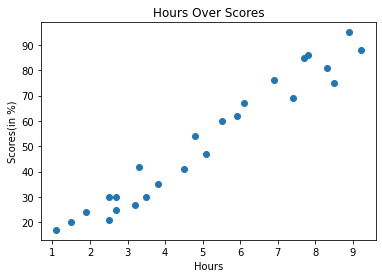

In [12]:
plt.scatter(df['Hours'], df['Scores'])
plt.title("Hours Over Scores")
plt.xlabel("Hours")
plt.ylabel("Scores(in %)")
plt.show()

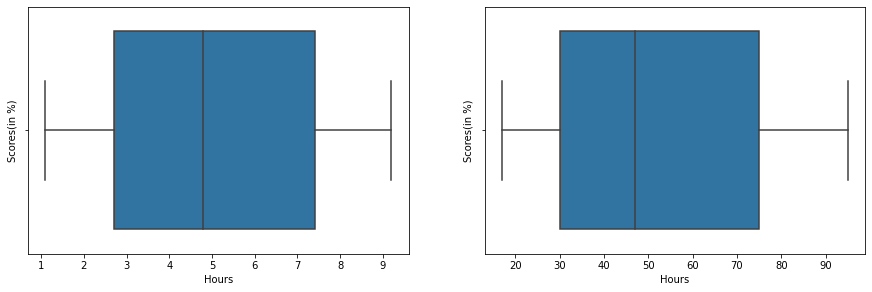

In [13]:
#detecting  for outliars

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(df['Hours'])
plt.xlabel("Hours")
plt.ylabel("Scores(in %)")

plt.subplot(222)
sns.boxplot(df['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores(in %)")
plt.show()


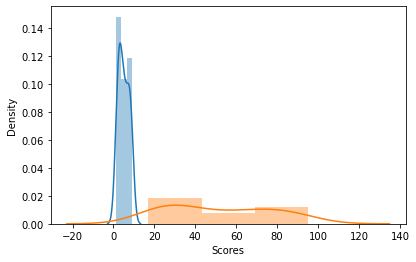

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Hours'])

plt.subplot(121)
sns.distplot(df['Scores'])

plt.show()

#### Training the Algorithm

In [15]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [16]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [17]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [22]:
y_test.head()

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [23]:
#we predict for a given dataset and check that weather we get a correct perdiction or not

lr.predict(X_test.iloc[3].values.reshape(1,1))

array([26.79480124])

Text(0, 0.5, 'Scores')

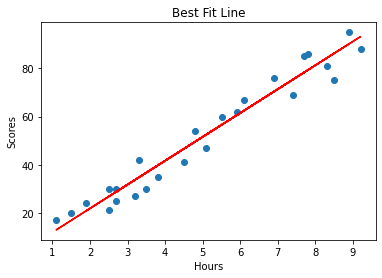

In [24]:
# now we see whats best fit line sklearn get

plt.scatter(df['Hours'],df['Scores'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title("Best Fit Line")
plt.xlabel('Hours')
plt.ylabel('Scores')

In [25]:
print(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [26]:
y_pred = lr.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [27]:
data = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
data

,Actual,Prediction
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [28]:
print(lr.coef_)
print(lr.intercept_)

[9.91065648]
2.018160041434683


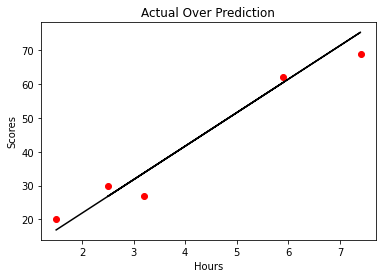

In [29]:
plt.scatter(x=X_test,y=y_test,color='r')
plt.plot(X_test,y_pred,color='black')
plt.title("Actual Over Prediction")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Checking Accuracy Scores 

In [34]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

21.5987693072174


In [35]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

4.183859899002975


In [32]:
r2_score(y_test,y_pred)

0.9454906892105356

#### Predict Score for 9.25 hours

In [48]:
predict_score = lr.predict([[9.25]])
print(predict_score)

[93.69173249]


In [47]:
print("The Predicted Score if a student studies for 9.25 hrs/day",(predict_score))

The Predicted Score if a student studies for 9.25 hrs/day [93.69173249]
